In [1]:
include("PVCR.jl");

## Residential Cases
The analysis of optimal adoption in residential cases uses a decision making model as follows: 
 - The adoption of PV shouldn't induce net economic losses within the 5 years, calculated as the simple sum of the first 60 bills. 
 - The optimal PV is the system that returns the largest NPV over a 10 year period using a consumer's rate of return for capital value. In the case of residential the rate is 0.0 since the expectation is to see saving over all the periods. 

In [2]:
consumption = 100:50:2500
pv_res = []
for (ix, co) in enumerate(consumption)
    residential.econsumption = co; get_pmax(residential);
    res = optimal_pv(residential, PVRes, 0.0:0.5:15, BAC1, tariff_increase = true)
    push!(pv_res, res[1][2])
end

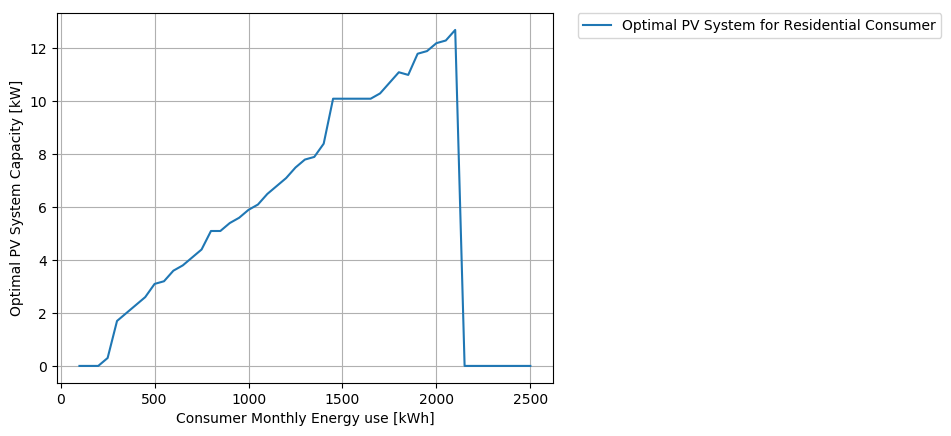

In [3]:
plot(consumption, pv_res, label = "Optimal PV System for Residential Consumer")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");

## Commercial Industrial Cases
The analysis of optimal adoption in commercial-industrial cases uses a decision making model as follows: 
 - The optimal PV is the system that returns the largest NPV over a 10 year period using a consumer's rate of return for capital value. In the case of residential the rate is 6.0 % the same as the reference rate of risk free APY in colones

In [4]:
consumption1 = 500:50:3000
pv_comind = []
for (ix, co) in enumerate(consumption1)
    commercial.econsumption = co; get_pmax(commercial);
    res = optimal_pv(commercial, PVComInd, 0.0:0.5:20, BAC1, tariff_increase = true)
    push!(pv_comind, res[1][2])
end

In [5]:
consumption2 = 3500:50:6000
for (ix, co) in enumerate(consumption2)
    commercial.econsumption = co; get_pmax(commercial);
    res = optimal_pv(commercial, PVComInd, 0.0:1:40, BAC1, tariff_increase = true)
    push!(pv_comind, res[1][2])
end

In [6]:
consumption3 = 6100:100:10000
for (ix, co) in enumerate(consumption3)
    commercial.econsumption = co; get_pmax(commercial);
    res = optimal_pv(commercial, PVComInd, 0.0:1:100, BAC1, tariff_increase = true)
    push!(pv_comind, res[1][2])
end

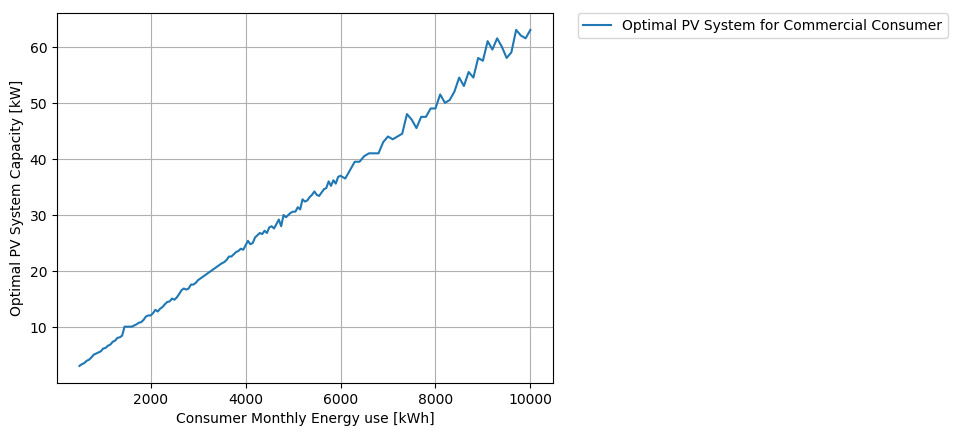

In [7]:
plot(vcat(consumption1, consumption2, consumption3), pv_comind, label = "Optimal PV System for Commercial Consumer")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");

## Medium Voltage Cases
- Uses same criteria as in the Commercial - Industrial cases 

In [8]:
consumption = 10000:5000:100000
pv_tmt = []
for (ix, co) in enumerate(consumption)
     mediumvoltage.econsumption = co; get_pmax(mediumvoltage);
    res = optimal_pv(mediumvoltage, PVTMT, 0:10.0:1000.0, BAC1, tariff_increase = true)
    push!(pv_tmt, res[1][2])
end

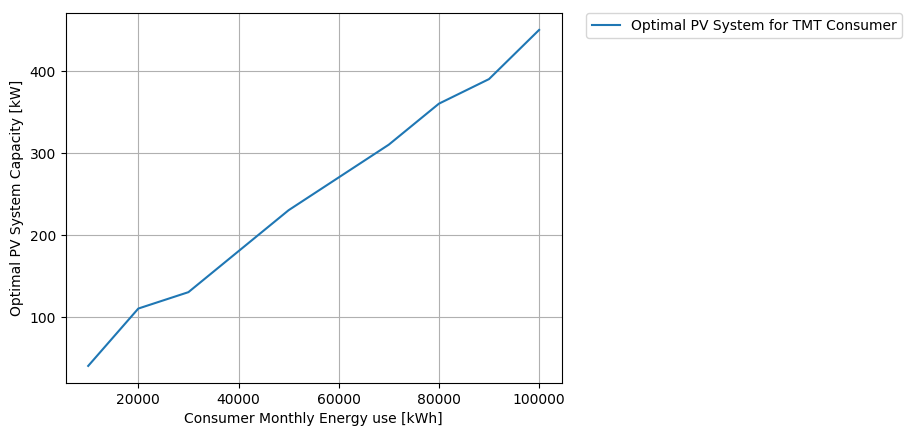

In [9]:
plot(consumption,pv_tmt, label = "Optimal PV System for TMT Consumer")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");

# Alternative Rate Model

# Residential Cases
The analysis of optimal adoption in residential cases uses a decision making model as follows: 
 - The adoption of PV shouldn't induce net economic losses within the 5 years, calculated as the simple sum of the first 60 bills. 
 - The optimal PV is the system that returns the largest NPV over a 10 year period using a consumer's rate of return for capital value. In the case of residential the rate is 0.0 since the expectation is to see saving over all the periods. 

In [10]:
consumption = 100:50:2500
pv_alt_res = []
residential.tariff = A_R_CNFL
for (ix, co) in enumerate(consumption)
    residential.econsumption = co; get_pmax(residential);
    res = optimal_pv(residential, PVRes, 0.0:0.5:15, BAC1, tariff_increase = true)
    push!(pv_alt_res, res[1][2])
end

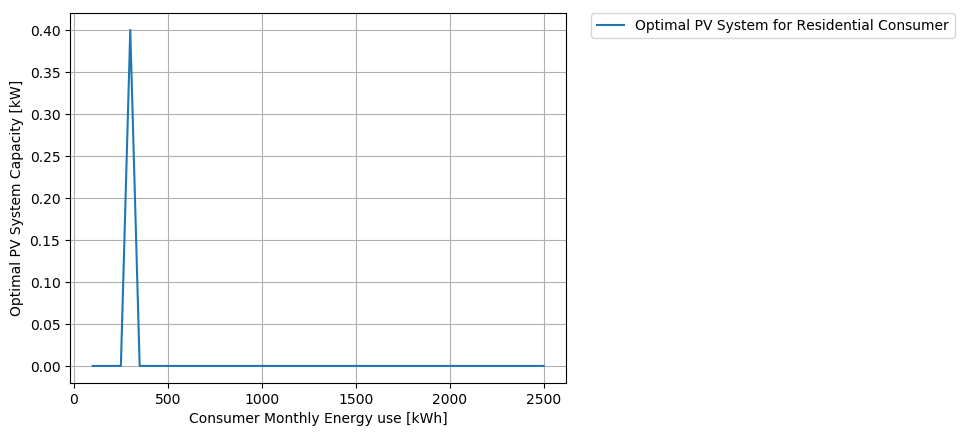

In [11]:
plot(consumption,pv_alt_res, label = "Optimal PV System for Residential Consumer")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");

# Commercial Industrial Cases
The analysis of optimal adoption in commercial-industrial cases uses a decision making model as follows: 
 - The optimal PV is the system that returns the largest NPV over a 10 year period using a consumer's rate of return for capital value. In the case of residential the rate is 6.0 % the same as the reference rate of risk free APY in colones

In [12]:
commercial.tariff = A_CI_CNFL
consumption1 = 500:50:3000
pv_alt_comind = []
for (ix, co) in enumerate(consumption1)
    commercial.econsumption = co; get_pmax(commercial);
    res = optimal_pv(commercial, PVComInd, 0.0:0.5:20, BAC1, tariff_increase = true)
    push!(pv_alt_comind, res[1][2])
end

In [13]:
consumption2 = 3500:50:6000
for (ix, co) in enumerate(consumption2)
    commercial.econsumption = co; get_pmax(commercial);
    res = optimal_pv(commercial, PVComInd, 0.0:1:40, BAC1, tariff_increase = true)
    push!(pv_alt_comind, res[1][2])
end

In [14]:
consumption3 = 6100:100:10000
for (ix, co) in enumerate(consumption3)
    commercial.econsumption = co; get_pmax(commercial);
    res = optimal_pv(commercial, PVComInd, 0.0:1:100, BAC1, tariff_increase = true)
    push!(pv_alt_comind, res[1][2])
end

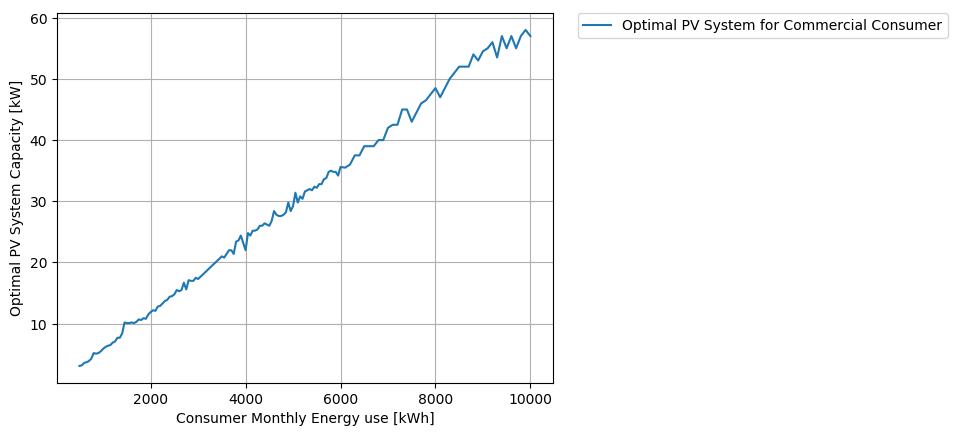

In [15]:
plot(vcat(consumption1, consumption2, consumption3),pv_alt_comind, label = "Optimal PV System for Commercial Consumer")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");

# Medium Voltage Cases
- Uses same criteria as in the Commercial - Industrial cases 

In [16]:
mediumvoltage.tariff = A_TMT_CNFL
consumption = 10000:5000:100000
pv_alt_tmt = []
for (ix, co) in enumerate(consumption)
     mediumvoltage.econsumption = co; get_pmax(mediumvoltage);
    res = optimal_pv(mediumvoltage, PVTMT, 0:10.0:1000.0, BAC1, tariff_increase = true)
    push!(pv_alt_tmt, res[1][2])
end

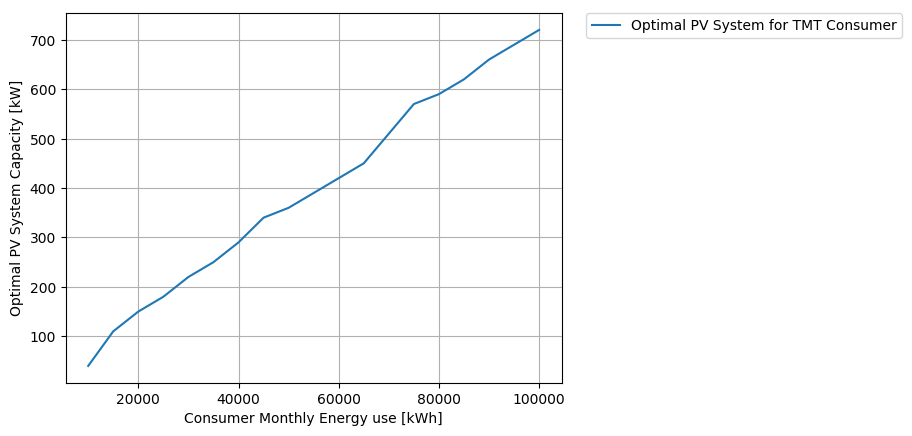

In [17]:
plot(consumption, pv_alt_tmt, label = "Optimal PV System for TMT Consumer")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("Optimal PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");